### Исследование возможностей извлечения триплетов из предварительно суммированного текста

Исследовались два варианта:
- использование правил на основе синтаксиса
- попытка с помощью повторной суммаризации через нейронную сеть добиться еще большего сокращения текста

### Пристрелка

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_excel('/content/drive/MyDrive/news_graph_project/triplets_root_left_right_v01.xlsx', header=0)

In [20]:
df.head()

,text,summary,SUBJECT,ROOT,OBJECT
0,ЛДПР проверит информацию о сотруднике партийно...,ЛДПР проверит информацию о сотруднике партийно...,['ЛДПР'],[проверит],['информацию о сотруднике партийного телеканал...
1,Экстренное предупреждение выпущено по Воронежс...,Экстренное предупреждение выпущено по Воронежс...,['Экстренное предупреждение'],[выпущено],['по Воронежской и Липецкой областям']
2,"В Стамбуле, где из-за снегопадов закрылся аэро...","В Стамбуле, где из-за снегопадов закрылся аэро...","['В Стамбуле, где из-за снегопадов закрылся аэ...",[находятся],['около 2 тыс туристов из России']
3,Герман Греф считает третью волну коронавируса ...,Греф: Третья волна коронавируса в России будет...,[],[],[]
4,Козак: никаких проектов договоренностей по вст...,Козак: никаких проектов договоренностей по вст...,[],[],[]


In [8]:
!pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 1.2 MB/s 
     |████████████████████████████████| 41 kB 98 kB/s 
     |████████████████████████████████| 55 kB 4.7 MB/s 
     |████████████████████████████████| 49 kB 7.8 MB/s 
     |████████████████████████████████| 8.2 MB 55.0 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=a342795450a5a0ca8755c3e064c476f2a578b61408924eaec66296d374b91880
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=45e67a877680e67fa2d2bee33ab4129ca0ca92b96dd645de409d00057ad8fdc3
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built intervaltree docopt
  Attempting uninstall: intervaltree
    Foun

In [74]:
# from razdel import sentenize, tokenize
# from navec import Navec
# from slovnet import Morph
# from slovnet import NER
# from ipymarkup import show_span_ascii_markup as show_markup

In [31]:
# navec = Navec.load('/content/drive/MyDrive/news_graph_project/navec_news_v1_1B_250K_300d_100q.tar')

In [32]:
# ner = NER.load('/content/drive/MyDrive/news_graph_project/slovnet_ner_news_v1.tar', batch_size=32)

In [73]:
# ner.navec(navec)

In [72]:
# markup = ner(df.summary[0])

In [71]:
# show_markup(markup.text, markup.spans)

In [70]:
# markup

In [48]:
# ner_list = []
# for span in markup.spans:
#     ner = markup.text[span.start:span.stop]
#     ner_list.append((ner, span.type))

In [49]:
# ner_list

[('ЛДПР', 'ORG'), ('Москве', 'LOC')]

In [9]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    PER,
    NamesExtractor,
    Doc
)

In [10]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [11]:
doc = Doc(df.summary[0])

In [83]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.tag_ner(ner_tagger)
doc.parse_syntax(syntax_parser)

# приведение к нормальной форме
for span in doc.spans:
  span.normalize(morph_vocab)

In [87]:
doc.spans

[DocSpan(stop=4, type='ORG', text='ЛДПР', tokens=[...], normal='ЛДПР'),
 DocSpan(start=127, stop=133, type='LOC', text='Москве', tokens=[...], normal='Москва')]

In [68]:
doc.spans[0].normal

'ЛДПР'

In [69]:
doc.spans[0].type

'ORG'

In [104]:
ner_list = []
for span in doc.spans:
  ner_list.append((span.normal, span.text, span.type, int(span.tokens[0].id[2:])))
ner_list

[('ЛДПР', 'ЛДПР', 'ORG', 1), ('Москва', 'Москве', 'LOC', 17)]

In [85]:
doc.syntax.print()

        ┌► ЛДПР        nsubj
      ┌─└─ проверит    
    ┌─└──► информацию  obj
    │   ┌► о           case
  ┌─└──►└─ сотруднике  nmod
  │     ┌► партийного  amod
┌─└────►└─ телеканала  nmod
│     ┌──► ,           punct
│     │ ┌► который     nsubj
└──►┌─└─└─ продавал    acl:relcl
    │   ┌► пресс-карты amod
    └──►└─ канала      obj
      ┌──► для         case
      │ ┌► свободного  amod
    ┌─└─└─ перемещения 
    │   ┌► по          case
    └──►└─ Москве      nmod


In [125]:
short_sent = []

for token in doc.tokens:
    if token.pos in ['NOUN', 'PROPN', 'VERB', 'ADP'] :
      short_sent.append(token)

short_sent

[DocToken(stop=4, text='ЛДПР', id='1_1', head_id='1_2', rel='nsubj', pos='PROPN', feats=<Inan,Nom,Fem,Sing>),
 DocToken(start=5, stop=13, text='проверит', id='1_2', head_id='1_0', rel='root', pos='VERB', feats=<Perf,Ind,Sing,3,Fut,Fin,Act>),
 DocToken(start=14, stop=24, text='информацию', id='1_3', head_id='1_2', rel='obj', pos='NOUN', feats=<Inan,Acc,Fem,Sing>),
 DocToken(start=25, stop=26, text='о', id='1_4', head_id='1_5', rel='case', pos='ADP'),
 DocToken(start=27, stop=37, text='сотруднике', id='1_5', head_id='1_3', rel='nmod', pos='NOUN', feats=<Anim,Loc,Masc,Sing>),
 DocToken(start=49, stop=59, text='телеканала', id='1_7', head_id='1_5', rel='nmod', pos='NOUN', feats=<Inan,Gen,Masc,Sing>),
 DocToken(start=69, stop=77, text='продавал', id='1_10', head_id='1_7', rel='acl:relcl', pos='VERB', feats=<Imp,Masc,Ind,Sing,Past,Fin,Act>),
 DocToken(start=78, stop=89, text='пресс-карты', id='1_11', head_id='1_12', rel='amod', pos='NOUN', feats=<Inan,Acc,Neut,Plur>),
 DocToken(start=90, sto

### Извлечение триплетов из текста

In [49]:
def find_pos_text(ner, tokens, type=['VERB'], window=5):
    start = ner[3]
    end = min(ner[3]+window, len(tokens))
    list_ = []

    for i in range(start, end):
        if tokens[i].pos in type:
           list_.append(tokens[i].text)
    return list_

In [55]:
def take_triplets(doc, ner_list):
  triplets = []
  for ner in ner_list:
      verb  = find_pos_text(ner, doc.tokens, ['VERB'])
      noun = find_pos_text(ner, doc.tokens, ['NOUN',  'ADP'])

      if verb and noun:
          triplets.append((ner[0], verb, noun))
  return triplets

In [56]:
def extract_ner(doc):
    ner_list = []
    for span in doc.spans:
      ner_list.append((span.normal, span.text, span.type, int(span.tokens[0].id[2:])))
    
    return ner_list

In [66]:
def triplets_pipeline(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.tag_ner(ner_tagger)
    doc.parse_syntax(syntax_parser)

    # приведение к нормальной форме
    for span in doc.spans:
        span.normalize(morph_vocab)
    
    ner_list = extract_ner(doc)
    triplets = []
    #нам интересны связи только если упоминается больше одного NER
    if len(ner_list)>1:
        triplets = take_triplets(doc, ner_list)
    #связываем упоминающиеся сущности в один триплет
    ner_triplets = []
    if len(triplets) != 0:
        for triplet in triplets:
            for ner in ner_list:
              if ner[0] != triplet[0]:
                  #Формула триплета: NER_1 - relation[verb+noun] - NER_2
                  ner_triplets.append((triplet[0], [triplet[1], triplet[2]], ner[0]))

    return [ner_list, ner_triplets]

In [67]:
df.summary.iloc[:2].apply(triplets_pipeline)[0][1]

[('ЛДПР', [['проверит'], ['информацию', 'о', 'сотруднике']], 'Москва')]

In [68]:
%%time

df['triplets'] = df.summary.apply(triplets_pipeline)

CPU times: user 19.5 s, sys: 12 s, total: 31.4 s
Wall time: 16.1 s


In [69]:
with open('triplets.json', 'w', encoding='utf-8') as file:
    df['triplets'].to_json(file, force_ascii=False)


### Make shorter summary (didn't work out)

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 7.7 MB/s 
     |████████████████████████████████| 163 kB 68.0 MB/s 
     |████████████████████████████████| 7.6 MB 57.1 MB/s 


In [3]:
import re
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


def inference(texts, model, tokenizer, 
               tokenizer_kwargs = {}, 
               generate_kwargs = {}, 
               num_beams=5,):
        
    input_ids = tokenizer(
        texts,
        return_tensors="pt",
        **tokenizer_kwargs
    ).to(device)
    
    output_ids = model.generate(
        **input_ids,
        num_beams=num_beams,
        **generate_kwargs
    )

    summary = tokenizer.batch_decode(
        output_ids,
        skip_special_tokens=True,
    )
    return summary

In [12]:
def make_shorter_summary(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    # doc.tag_ner(ner_tagger)
    doc.parse_syntax(syntax_parser)
    short_sent = []
    
    for token in doc.tokens:
      if token.pos in ['NOUN', 'PROPN', 'VERB', 'ADP'] :
        short_sent.append(token.text)

    # print(short_sent)
    return ' '.join(short_sent)

In [21]:
%%time
df['shorter_summary'] = df.summary.apply(lambda x: make_shorter_summary(x))

CPU times: user 12.9 s, sys: 8.04 s, total: 20.9 s
Wall time: 10.7 s


In [22]:
df['shorter_summary']

0       ЛДПР проверит информацию о сотруднике телекана...
1                     предупреждение выпущено по областям
2       В Стамбуле из-за снегопадов закрылся аэропорт ...
3                        Греф волна коронавируса в России
4       Козак проектов договоренностей по встрече Пути...
                              ...                        
1995    Работодатель расторгнуть договор с работником ...
1996                    ЮТэйр перевела в реестр самолетов
1997    Хакеры могли получить доступ к системам поддер...
1998    Экс-предстоятель церкви Филарет госпитализиров...
1999    Кэри Кавано договоренности лидеров поражение А...
Name: shorter_summary, Length: 2000, dtype: object

In [23]:
experiment = {
        "experiment_name": "IlyaGusev__rut5_base_headline_gen_telegram",
        "model_name": "IlyaGusev/rut5_base_headline_gen_telegram",
        "text_prefix": "",
        "tokenizer_kwargs": {"max_length": 600,"padding": True, "truncation": True, "add_special_tokens": True},
        "generate_kwargs": {}
    }

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

device

device(type='cuda')

In [16]:
dataloader = DataLoader(df.shorter_summary.to_list(), batch_size=32)
tokenizer = AutoTokenizer.from_pretrained(experiment["model_name"])
model = AutoModelForSeq2SeqLM.from_pretrained(experiment["model_name"])
model.to(device);

Downloading:   0%|          | 0.00/327 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/828k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/766 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/977M [00:00<?, ?B/s]

In [24]:
results = []
for batch in tqdm(dataloader):
    results.extend(inference(batch, model, tokenizer, 
                             experiment["tokenizer_kwargs"], 
                             experiment["generate_kwargs"]))

df['even_shorter'] = pd.Series(results, index=df.index)

  0%|          | 0/63 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1301: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 100 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,
100%|██████████| 63/63 [01:36<00:00,  1.53s/it]


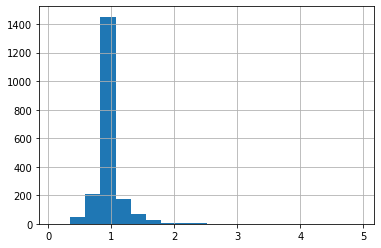

In [27]:
(df['even_shorter'].apply(len)/ df['shorter_summary'].apply(len)).hist(bins=20)